In [126]:
# Importing necessary libraries for dataclean
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import os
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     /home/5a19efe1-b761-4c88-855d-
[nltk_data]     8dc5b6196096/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/5a19efe1-b761-4c88-855d-
[nltk_data]     8dc5b6196096/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/5a19efe1-b761-4c88-855d-
[nltk_data]     8dc5b6196096/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
# Importing tools for preprocessing and analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np


In [130]:
#Import Data
data = pd.read_csv('./collected_data_raw_initial2.csv', encoding = 'utf-8-sig')
data.head(10)

,Unnamed: 0,Video Id,Title,Description,Comments,Query,Pro_or_Con,Informative,Markup_terms
0,0,vGj_eEDLRyY,tw e d | high restriction what i eat in a day,love you :☆,NaN,what i eat in a day high restriction,1,0,1
1,1,2U0zFtD-FSQ,TW:ED | What I Eat in a Week ♡ High Restrictio...,TW:ED // I am not promoting this lifestyle .. ...,NaN,what i eat in a day high restriction,1,0,1
2,2,zenSuGmybJI,tw 3d | what I 3at in a week - 5 days of mid r...,#edtwt,NaN,what i eat in a day high restriction,1,0,1
3,3,wYjd6y2y_ZU,tw ed | vlog: what i eat in a week of high res...,#eating \n\n┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈\nhi !! \nth...,NaN,what i eat in a day high restriction,1,0,1
4,4,67vGc6s-IcI,TW: ED / What I eat in a day / high restriction,#shorts\n\n⚠️TW⚠️\nI do not promote eating dis...,NaN,what i eat in a day high restriction,1,0,1
5,5,ut5X3KeEZfY,tw ed // what i eat in a day // high restricti...,first vid ^^;!!\nHi this is what a day on my h...,NaN,what i eat in a day high restriction,1,0,1
6,6,-mw2J31CP0A,What I Eat In A Day: DisOrded Eating Edition. ...,NaN,NaN,what i eat in a day high restriction,1,0,1
7,7,0s6ohWO6YXY,tw ed / what I eat in a day (restricting) #1,this is my own document of my diet\n\noriginal...,NaN,what i eat in a day high restriction,1,0,1
8,8,eoxBkhLbI_g,tw ed // what I eat in a week // high res &amp...,I’m not here to promote EDs. I’m here to share...,NaN,what i eat in a day high restriction,1,0,1
9,9,VOWCK0iCtKw,( tw: ed) what I eat in a day | high res | die...,NaN,NaN,what i eat in a day high restriction,1,0,1


In [132]:

####STEP 1: DATACLEAN####

data['Title'] = data['Title'].map(lambda x: re.sub(r'\d+', '', str(x)))
data['Description'] = data['Description'].map(lambda x: re.sub(r'\d+', '', str(x)))


data['Title'] = data['Title'].map(lambda x: x.lower())
data['Description'] = data['Description'].map(lambda x: x.lower())


data['Title']  = data['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
data['Description']  = data['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

data['Title'] = data['Title'].map(lambda x: x.strip())
data['Description'] = data['Description'].map(lambda x: x.strip())

data['Title'] = data['Title'].map(lambda x: word_tokenize(x))
data['Description'] = data['Description'].map(lambda x: word_tokenize(x))

data['Title'] = data['Title'].map(lambda x: [word for word in x if word.isalpha()])
data['Description'] = data['Description'].map(lambda x: [word for word in x if word.isalpha()])

stop_words = set(stopwords.words('english'))
data['Title'] = data['Title'].map(lambda x: [w for w in x if not w in stop_words])
data['Description'] = data['Description'].map(lambda x: [w for w in x if not w in stop_words])
#df['TextColumn'] = df['TextColumn'].replace('[nan]', '', regex=True)

#word lemmatization
lem = WordNetLemmatizer()
data['Title'] = data['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
data['Description'] = data['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

#take off links people put in the description
data['Description'] = data['Description'].map(lambda lst: [word for word in lst if not word.startswith("https")])

data.head(10)

,Unnamed: 0,Video Id,Title,Description,Comments,Query,Pro_or_Con,Informative,Markup_terms
0,0,vGj_eEDLRyY,"[tw, e, high, restriction, eat, day]",[love],NaN,what i eat in a day high restriction,1,0,1
1,1,2U0zFtD-FSQ,"[twed, eat, week, high, restriction, diet, vlog]","[twed, promote, lifestyle, please, read, discl...",NaN,what i eat in a day high restriction,1,0,1
2,2,zenSuGmybJI,"[tw, week, days, mid, restriction]",[edtwt],NaN,what i eat in a day high restriction,1,0,1
3,3,wYjd6y2y_ZU,"[tw, ed, vlog, eat, week, high, restrictions]","[eat, hi, first, video, pls, leave, comment, a...",NaN,what i eat in a day high restriction,1,0,1
4,4,67vGc6s-IcI,"[tw, ed, eat, day, high, restriction]","[short, promote, eat, disorder, want, glamoriz...",NaN,what i eat in a day high restriction,1,0,1
5,5,ut5X3KeEZfY,"[tw, ed, eat, day, high, restriction, edition,...","[first, vid, hi, day, high, restriction, diet,...",NaN,what i eat in a day high restriction,1,0,1
6,6,-mw2J31CP0A,"[eat, day, disorded, eat, edition, lowcalorie,...",[nan],NaN,what i eat in a day high restriction,1,0,1
7,7,0s6ohWO6YXY,"[tw, ed, eat, day, restrict]","[document, diet, original, music]",NaN,what i eat in a day high restriction,1,0,1
8,8,eoxBkhLbI_g,"[tw, ed, eat, week, high, res, amp, binge, ed,...","[promote, eds, share, struggle, one, bother, s...",NaN,what i eat in a day high restriction,1,0,1
9,9,VOWCK0iCtKw,"[tw, ed, eat, day, high, res, diet, vlog]",[nan],NaN,what i eat in a day high restriction,1,0,1


In [134]:
#turn list back to string
data['Title'] = data['Title'].map(lambda x: ' '.join(x))
data['Description'] = data['Description'].map(lambda x: ' '.join(x))
data.head(10)

,Unnamed: 0,Video Id,Title,Description,Comments,Query,Pro_or_Con,Informative,Markup_terms
0,0,vGj_eEDLRyY,tw e high restriction eat day,love,NaN,what i eat in a day high restriction,1,0,1
1,1,2U0zFtD-FSQ,twed eat week high restriction diet vlog,twed promote lifestyle please read disclaimer ...,NaN,what i eat in a day high restriction,1,0,1
2,2,zenSuGmybJI,tw week days mid restriction,edtwt,NaN,what i eat in a day high restriction,1,0,1
3,3,wYjd6y2y_ZU,tw ed vlog eat week high restrictions,eat hi first video pls leave comment anything ...,NaN,what i eat in a day high restriction,1,0,1
4,4,67vGc6s-IcI,tw ed eat day high restriction,short promote eat disorder want glamorize roma...,NaN,what i eat in a day high restriction,1,0,1
5,5,ut5X3KeEZfY,tw ed eat day high restriction edition cals,first vid hi day high restriction diet look li...,NaN,what i eat in a day high restriction,1,0,1
6,6,-mw2J31CP0A,eat day disorded eat edition lowcalorie wieiad...,nan,NaN,what i eat in a day high restriction,1,0,1
7,7,0s6ohWO6YXY,tw ed eat day restrict,document diet original music,NaN,what i eat in a day high restriction,1,0,1
8,8,eoxBkhLbI_g,tw ed eat week high res amp binge ed vlog,promote eds share struggle one bother simply w...,NaN,what i eat in a day high restriction,1,0,1
9,9,VOWCK0iCtKw,tw ed eat day high res diet vlog,nan,NaN,what i eat in a day high restriction,1,0,1


In [136]:
#for videos that do not have a description
data['Description'] = data['Description'].replace(['nan'], '', regex=True)
data.head(10)

,Unnamed: 0,Video Id,Title,Description,Comments,Query,Pro_or_Con,Informative,Markup_terms
0,0,vGj_eEDLRyY,tw e high restriction eat day,love,NaN,what i eat in a day high restriction,1,0,1
1,1,2U0zFtD-FSQ,twed eat week high restriction diet vlog,twed promote lifestyle please read disclaimer ...,NaN,what i eat in a day high restriction,1,0,1
2,2,zenSuGmybJI,tw week days mid restriction,edtwt,NaN,what i eat in a day high restriction,1,0,1
3,3,wYjd6y2y_ZU,tw ed vlog eat week high restrictions,eat hi first video pls leave comment anything ...,NaN,what i eat in a day high restriction,1,0,1
4,4,67vGc6s-IcI,tw ed eat day high restriction,short promote eat disorder want glamorize roma...,NaN,what i eat in a day high restriction,1,0,1
5,5,ut5X3KeEZfY,tw ed eat day high restriction edition cals,first vid hi day high restriction diet look li...,NaN,what i eat in a day high restriction,1,0,1
6,6,-mw2J31CP0A,eat day disorded eat edition lowcalorie wieiad...,,NaN,what i eat in a day high restriction,1,0,1
7,7,0s6ohWO6YXY,tw ed eat day restrict,document diet original music,NaN,what i eat in a day high restriction,1,0,1
8,8,eoxBkhLbI_g,tw ed eat week high res amp binge ed vlog,promote eds share struggle one bother simply w...,NaN,what i eat in a day high restriction,1,0,1
9,9,VOWCK0iCtKw,tw ed eat day high res diet vlog,,NaN,what i eat in a day high restriction,1,0,1


In [138]:
####STEP 2.1: USE TF IDF FOR KEYWORDS####
#encode classes by key word (tried by pro and con but too vague)
le = LabelEncoder()
le.fit(data.Query)
data.Query = le.transform(data.Query)

In [140]:
# TF-IDF => high score = keywords / important descriptors
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = data.Query

features_title = tfidf_title.fit_transform(data.Title).toarray()
features_description = tfidf_desc.fit_transform(data.Description).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (1302, 464)
Description Features Shape: (1302, 6099)


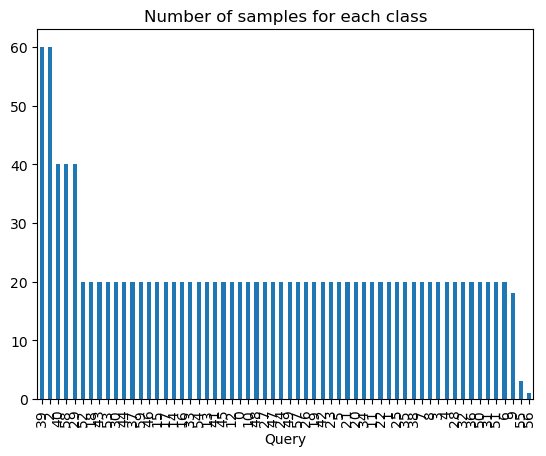

In [142]:
####STEP 3.1: UNIGRAM+BIGRAM ANALYSIS####
# Plotting class distribution
data['Query'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples',title='Number of samples for each class')
plt.show()

In [144]:
# Get 10 best keywords for each keyword, Title features (we only print the first 2)
N = 10
count1 = 1
count2 = 1


MAX_PRINT = 2
for current_class in list(le.classes_):
    if count1 > MAX_PRINT:
        break
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")
    count1 += 1

print("**********************************************************************************************************************************")



# '1000 calorie diet':
Most correlated unigrams:
------------------------------
. loss
. plan
. result
. days
. look
. update
. day
. calories
. doctor
. calorie
Most correlated bigrams:
------------------------------
. day fat
. lose weight
. weight loss
. fat loss
. eat calories
. diet plan
. loss diet
. look like
. calories day
. calorie day


# 'anarecovery anorexia recovery':
Most correlated unigrams:
------------------------------
. allin
. unglamorizing
. years
. veronica
. wright
. anorexiarecovery
. tiktoks
. recovery
. anorexia
. react
Most correlated bigrams:
------------------------------
. recreate video
. recovery anorexiarecovery
. allin anorexia
. unglamorizing eat
. tw eat
. story anorexia
. veronica wright
. recovery veronica
. day anorexia
. anorexia recovery


**********************************************************************************************************************************


In [146]:
# Get 10 best keywords for each keyword, Desc features (we only print the first 2)
N = 10
for current_class in list(le.classes_):
    if count2 > MAX_PRINT:
        break
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_description, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_desc.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")
    count2 += 1


# '1000 calorie diet':
Most correlated unigrams:
------------------------------
. babin
. retainer
. department
. tier
. scott
. sauce
. acft
. army
. calorie
. bland
Most correlated bigrams:
------------------------------
. certify obesity
. obesity family
. board certify
. access accurate
. increase access
. bland board
. dr scott
. facebook page
. calories day
. scott bland


# 'anarecovery anorexia recovery':
Most correlated unigrams:
------------------------------
. clearly
. grateful
. depop
. shoplittlerose
. commute
. heather
. roisinmitc
. didnt
. rorecovering
. grey
Most correlated bigrams:
------------------------------
. shoplittlerose tiktok
. anorexia recovery
. tiktok rorecovering
. depop shoplittlerose
. public library
. music public
. library commute
. roisinmitc depop
. instagram rorecovering
. instagram roisinmitc




In [ ]:
#Organizing by keyword gives insignificant results, let's try computing bigrams per side (pro or con)

In [148]:
####STEP 2.2: USE TF IDF FOR SIDES####
#encode classes by key word (tried by pro and con but too vague)
le = LabelEncoder()
le.fit(data.Pro_or_Con)
data.Pro_or_Con = le.transform(data.Pro_or_Con)

In [150]:
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=8, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=8, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = data.Pro_or_Con

features_title = tfidf_title.fit_transform(data.Title).toarray()
features_description = tfidf_desc.fit_transform(data.Description).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (1302, 249)
Description Features Shape: (1302, 3036)


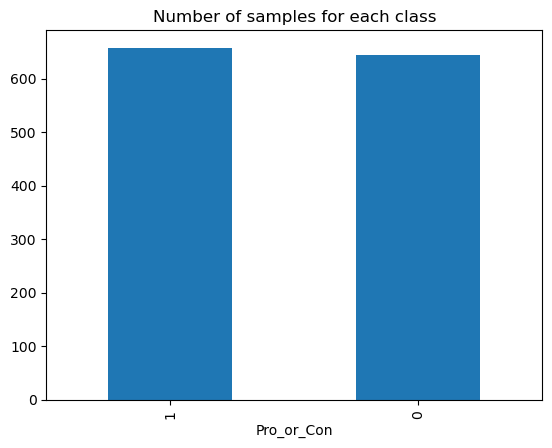

In [152]:
####STEP 3.2: UNIGRAM+BIGRAM ANALYSIS####
# Plotting class distribution
data['Pro_or_Con'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples',title='Number of samples for each class')
plt.show()
#slightly more samples for pro_ed content

In [154]:
# Get 10 best keywords for each keyword, Title features (we only print the first 2)
N = 20
count1 = 1
count2 = 1


MAX_PRINT = 2
for current_class in list(le.classes_):
    if count1 > MAX_PRINT:
        break
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")
    count1 += 1

print("**********************************************************************************************************************************")

# '0':
Most correlated unigrams:
------------------------------
. size
. recover
. gap
. days
. antidiet
. story
. calories
. workout
. culture
. fear
. thigh
. eat
. subliminal
. anorexia
. slim
. tw
. skinny
. fat
. recovery
. disorder
Most correlated bigrams:
------------------------------
. self love
. pro ana
. awareness week
. lose weight
. food freedom
. eat recovery
. body image
. disorder awareness
. national eat
. ed recovery
. fat loss
. body positivity
. diet culture
. thigh gap
. fear foods
. tw ed
. binge eat
. disorder recovery
. anorexia recovery
. eat disorder


# '1':
Most correlated unigrams:
------------------------------
. size
. recover
. gap
. days
. antidiet
. story
. calories
. workout
. culture
. fear
. thigh
. eat
. subliminal
. anorexia
. slim
. tw
. skinny
. fat
. recovery
. disorder
Most correlated bigrams:
------------------------------
. self love
. pro ana
. awareness week
. lose weight
. food freedom
. eat recovery
. body image
. disorder awareness
. n

In [ ]:
"""
Indicates there complete / significant overlap in the words used for both sides, this is because 
1) harmful content is hidden under 'tw' and other positive and recovery sounding terms, to avoid being banned
2) bigrams might not be able to capture the differences in how terms are used in one context or another
"""

In [382]:
# Importing ML models for training
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.layers import Dropout
from keras.regularizers import l1_l2

In [384]:
####STEP 4: MODEL TRAINING####
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 2:4], data['Pro_or_Con'], random_state = 0)
X_train_title_features = tfidf_title.transform(X_train['Title']).toarray()
X_train_desc_features = tfidf_desc.transform(X_train['Description']).toarray()
features = np.concatenate([X_train_title_features, X_train_desc_features], axis=1)


In [386]:
#3 models
#Naive Bayes
nb = MultinomialNB().fit(features, y_train)
#SVM
svm = linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3).fit(features,y_train)
#AdaBoost
adaboost = AdaBoostClassifier(n_estimators=40,algorithm="SAMME").fit(features,y_train)

In [162]:
#Pre processing data for training
# Most frequently will not go over 20000
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 50 
# fixed
EMBEDDING_DIM = 100

# combine titles and descriptions into 1 sentence
titles = data['Title'].values
descriptions = data['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index

#number of rows in our data = num of videos total
print('Found %s unique tokens.' % len(word_index))

Found 13435 unique tokens.


In [388]:
# convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)


# One-hot Encode labels
Y = pd.get_dummies(data['Pro_or_Con']).values


# Splitting into training and test set, choose 20-80%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

print('Shape of data tensor:', X.shape) #input length is 50
print('Shape of label tensor:', Y.shape) #classification model hence normal to get 2

Shape of data tensor: (1302, 50)
Shape of label tensor: (1302, 2)


In [390]:
#LSTM Model first
# Convert labels to binary format if not already
Y_train = data['Pro_or_Con'].values
Y_test = data['Pro_or_Con'].values

# Modify the output layer for binary classification
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) #one layer, tried adding up to 3, did worse

model.add(Dense(1, activation='sigmoid')) #since we are doing binary classification

# Y_train is one-dimensional w binary labels
is_binary_labels = len(Y_train.shape) == 1

# Compile the model
model.compile(loss='binary_crossentropy' if is_binary_labels else 'categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 50, 100)           2000000   
                                                                 
 spatial_dropout1d_16 (Spat  (None, 50, 100)           0         
 ialDropout1D)                                                   
                                                                 
 lstm_27 (LSTM)              (None, 100)               80400     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2080501 (7.94 MB)
Trainable params: 2080501 (7.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [392]:
# Training the LSTM Model
epochs = 20
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
14/14 [==============================] - 5s 117ms/step - loss: 0.6455 - accuracy: 0.7232 - val_loss: 1.5915 - val_accuracy: 0.0000e+00
Epoch 2/20
14/14 [==============================] - 2s 112ms/step - loss: 0.5606 - accuracy: 0.7494 - val_loss: 1.3818 - val_accuracy: 0.0000e+00
Epoch 3/20
14/14 [==============================] - 1s 94ms/step - loss: 0.5356 - accuracy: 0.7494 - val_loss: 1.4247 - val_accuracy: 0.0000e+00
Epoch 4/20
14/14 [==============================] - 1s 93ms/step - loss: 0.4887 - accuracy: 0.7494 - val_loss: 1.4307 - val_accuracy: 0.0000e+00
Epoch 5/20
14/14 [==============================] - 1s 93ms/step - loss: 0.3688 - accuracy: 0.8030 - val_loss: 1.6762 - val_accuracy: 0.1327
Epoch 6/20
14/14 [==============================] - 1s 86ms/step - loss: 0.2924 - accuracy: 0.8724 - val_loss: 2.0934 - val_accuracy: 0.1327
Epoch 7/20
14/14 [==============================] - 1s 95ms/step - loss: 0.2506 - accuracy: 0.8975 - val_loss: 2.4350 - val_accuracy: 0.

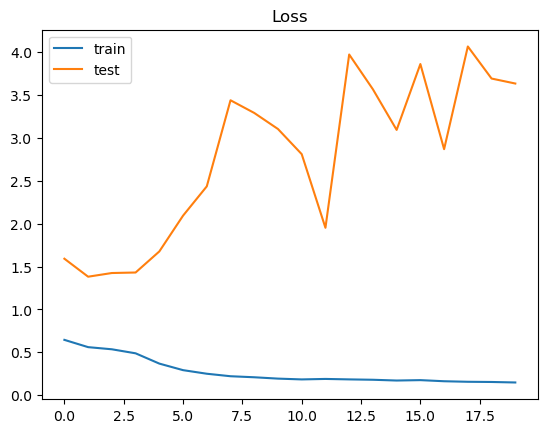

In [ ]:
## LOSS PLOT ##
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig('./results_models/lstm_loss_plot.png')
plt.show()

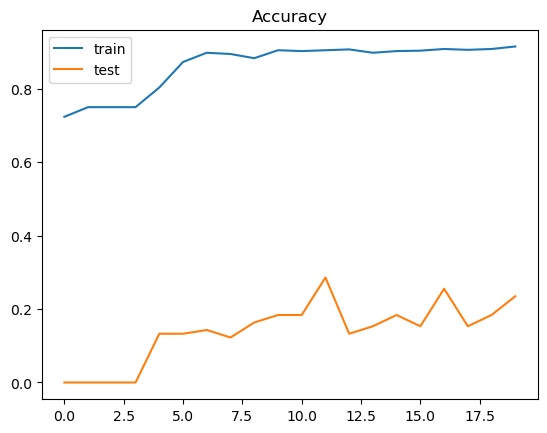

In [402]:
## ACCURACY PLOT ##

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')  
plt.plot(history.history['val_accuracy'], label='test')  
plt.legend()
plt.savefig('./results_models/lstm_acc_plot.png')
plt.show()


In [404]:
# Imports for Naive Bayes
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [406]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 2:4], data['Pro_or_Con'], random_state = 0)
X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

In [408]:
#Now we try Bayes
X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

# Naive Bayes
y_pred = nb.predict(test_features)
y_probas = nb.predict_proba(test_features)

class_labels = [str(cls) for cls in le.classes_]
print(metrics.classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       167
           1       0.95      0.91      0.93       159

    accuracy                           0.93       326
   macro avg       0.93      0.93      0.93       326
weighted avg       0.93      0.93      0.93       326



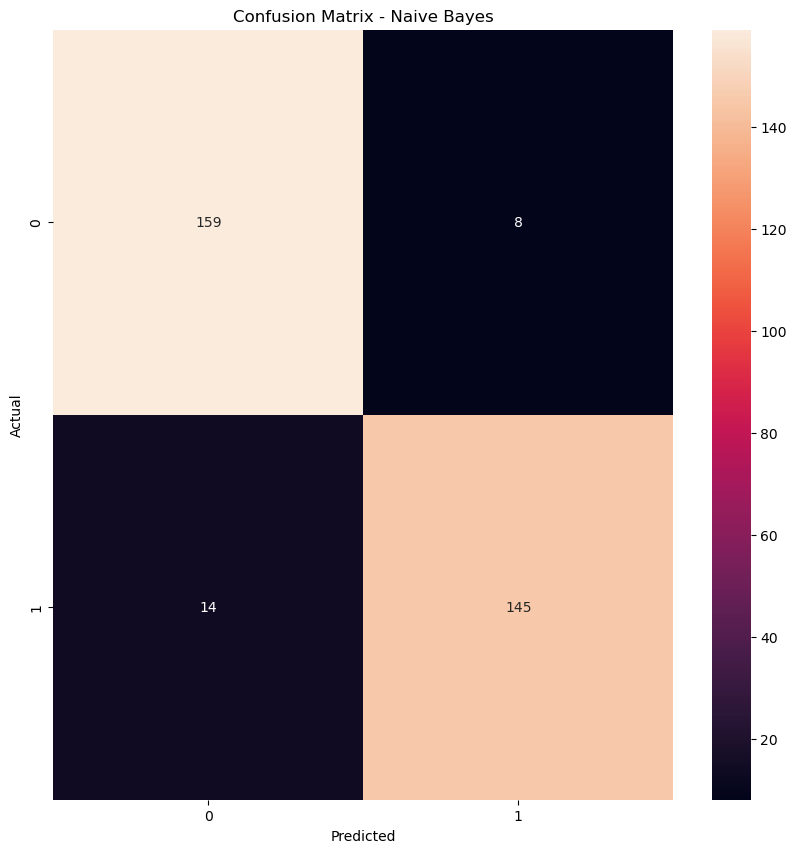

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


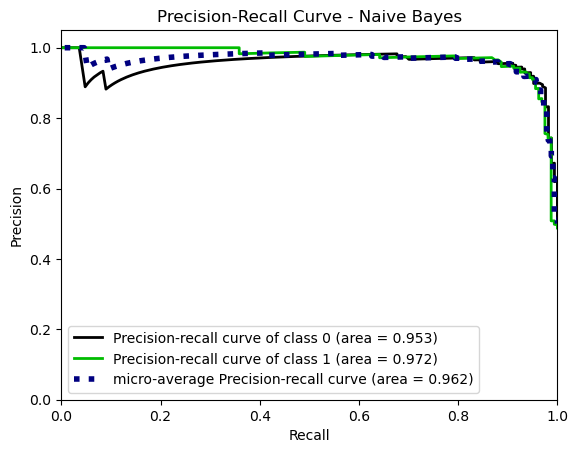

In [411]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.savefig('./results_models/nb_confusion_matrix.png')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.savefig('./results_models/nb_pr_curve.png')
plt.show()

In [360]:
#Now SVM
y_pred = svm.predict(test_features)
y_probas = svm.predict_proba(test_features)

class_labels = [str(cls) for cls in le.classes_]
print(metrics.classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.49      0.56      0.52       159
           1       0.51      0.44      0.47       167

    accuracy                           0.50       326
   macro avg       0.50      0.50      0.50       326
weighted avg       0.50      0.50      0.50       326



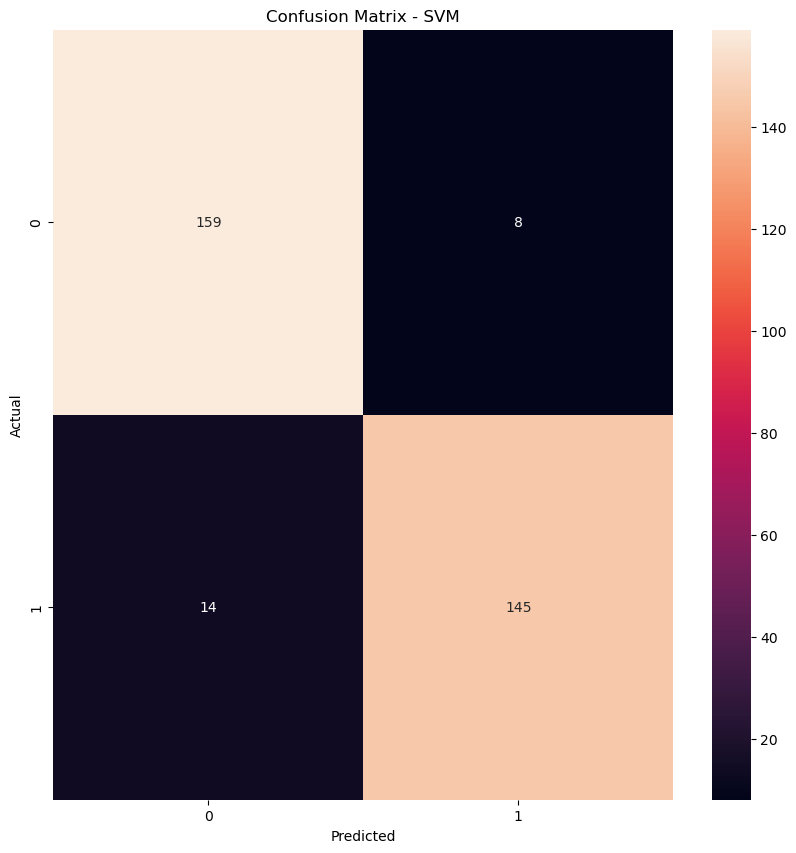

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


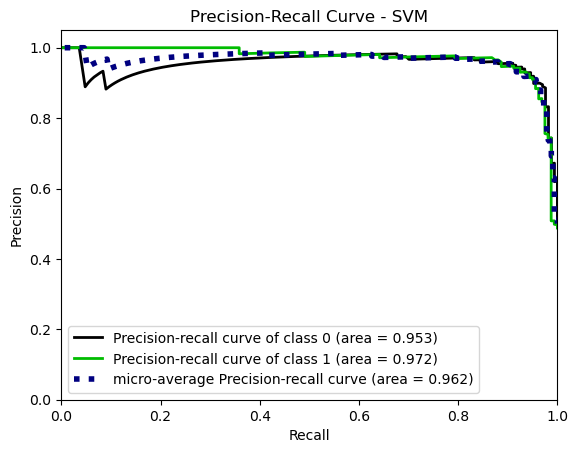

In [413]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.savefig('./results_models/svm_confusion_matrix.png')
plt.show()


skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - SVM')
plt.savefig('./results_models/svm_pr_curve.png')
plt.show()

In [364]:
# Finally Adaboost Classifier
y_pred = adaboost.predict(test_features)
y_probas = adaboost.predict_proba(test_features)

class_labels = [str(cls) for cls in le.classes_]
print(metrics.classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       167
           1       0.80      0.95      0.87       159

    accuracy                           0.86       326
   macro avg       0.87      0.86      0.86       326
weighted avg       0.87      0.86      0.86       326



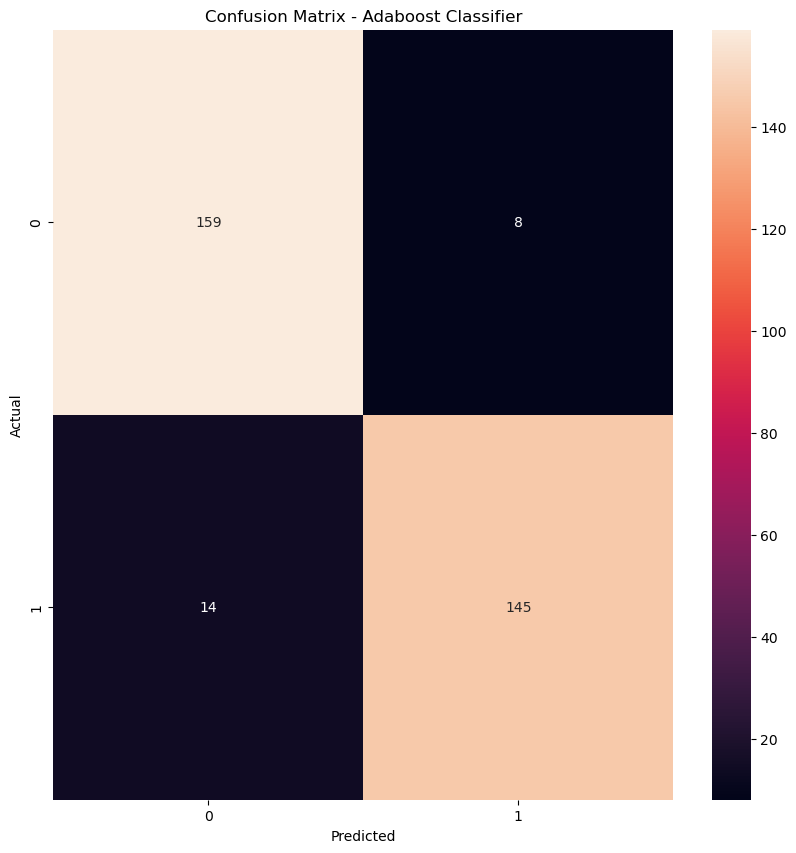

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


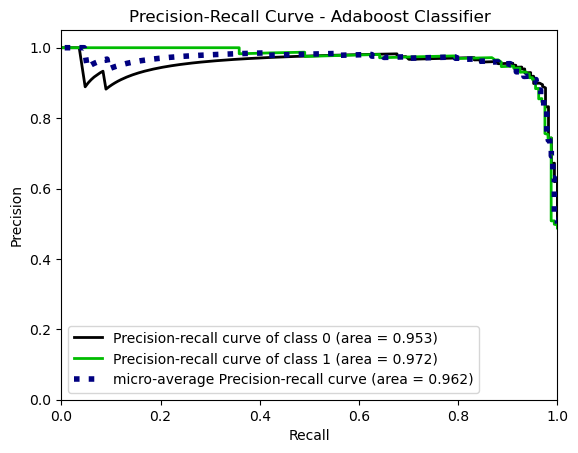

In [415]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Adaboost Classifier')
plt.savefig('./results_models/adaboost_confusion_matrix.png')
plt.show()


skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Adaboost Classifier')
plt.savefig('./results_models/adaboost_pr_curve.png')
plt.show()

In [417]:
# LSTM
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)
y_probas = model.predict(X_test) #problem: lstm performs very badly and only predicting class 0 = con-ED, model is not learning to differentiate between classes at all
y_probas = np.column_stack((1 - y_probas, y_probas)) #just to visualize the data better and have 2D array at least
y_pred = np.argmax(y_probas, axis=1)
y_test = np.argmax(Y_test, axis=1)

class_labels = [str(cls) for cls in le.classes_]
print(metrics.classification_report(y_test, y_pred, target_names=class_labels))


11/11 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.56      0.30      0.39       159
           1       0.54      0.78      0.64       167

    accuracy                           0.54       326
   macro avg       0.55      0.54      0.51       326
weighted avg       0.55      0.54      0.51       326



In [419]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 50, 100)           2000000   
                                                                 
 spatial_dropout1d_16 (Spat  (None, 50, 100)           0         
 ialDropout1D)                                                   
                                                                 
 lstm_27 (LSTM)              (None, 100)               80400     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2080501 (7.94 MB)
Trainable params: 2080501 (7.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


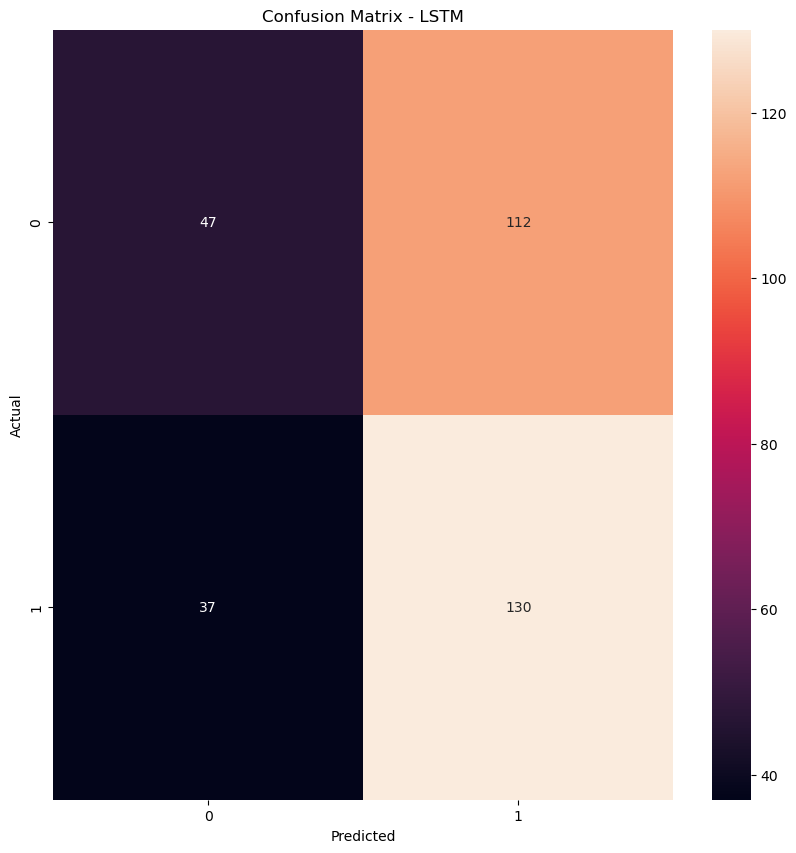

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


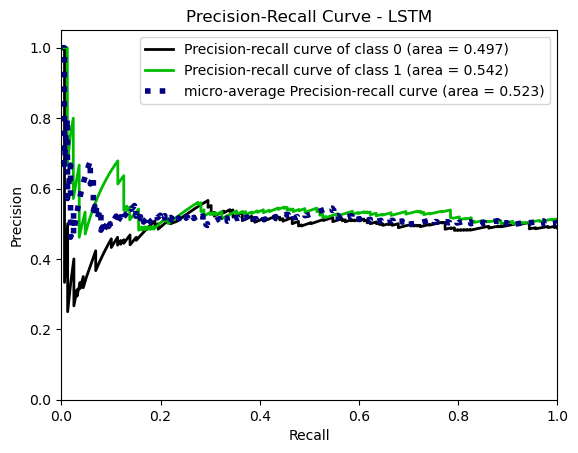

In [421]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LSTM')
plt.savefig('./results_models/lstm_confusion_matrix.png')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - LSTM')
plt.savefig('./results_models/lstm_pr_curve.png')
plt.show()